This Program attempts to optimize a users portfolio using the Efficient Frontier

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Choose stock symbols for a portfolio

assets = ['AAPL','MSFT','AMZN','TSLA','GOOG']

In [3]:
# Assign weights to the stocks
weights = np.repeat(0.2,5)

In [4]:
# Get the portfolio starting sate
portfolio_start_date = '2013-01-01'
# Get the portfolio ending data
portfolio_end_date = datetime.today().strftime('%Y-%m-%d')

In [5]:
# Create a dataframe to store the adjusted close pirce of the stocks
df = pd.DataFrame()

# Store Adjusted close price in
for stock in assets:
    df[stock] = yf.download(stock,period='1d', start=portfolio_start_date, end=portfolio_end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Show the DataFrame
df

,AAPL,MSFT,AMZN,TSLA,GOOG
Date,,,,,
2013-01-02,16.837114,22.774689,12.865500,2.357333,18.013729
2013-01-03,16.624596,22.469589,12.924000,2.318000,18.024191
2013-01-04,16.161520,22.049061,12.957500,2.293333,18.380356
2013-01-07,16.066454,22.007833,13.423000,2.289333,18.300158
2013-01-08,16.109699,21.892384,13.319000,2.245333,18.264042
...,...,...,...,...,...
2023-02-09,150.639999,263.619995,98.239998,207.320007,95.459999
2023-02-10,151.009995,263.100006,97.610001,196.889999,94.860001
2023-02-13,153.850006,271.320007,99.540001,194.639999,95.000000


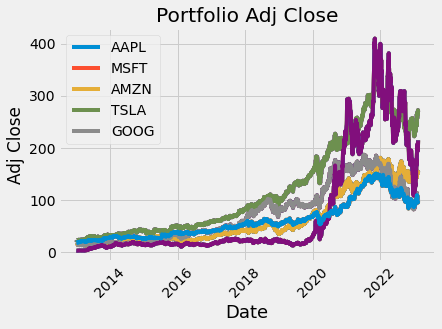

In [7]:
# Visually show portfolio

#Create and plot the graph

for c in df.columns.values:
    plt.plot(df, label = c)

plt.title('Portfolio Adj Close')
plt.xlabel('Date', fontsize = 18)
plt.xticks(rotation=45)
plt.ylabel('Adj Close')
plt.legend(df.columns.values, loc='upper left')
plt.show();

In [8]:
# Show the daily simple return
returns = df.pct_change()
returns

,AAPL,MSFT,AMZN,TSLA,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,-0.013396,0.004547,-0.016685,0.000581
2013-01-04,-0.027855,-0.018715,0.002592,-0.010642,0.019760
2013-01-07,-0.005882,-0.001870,0.035925,-0.001744,-0.004363
2013-01-08,0.002692,-0.005246,-0.007748,-0.019220,-0.001974
...,...,...,...,...,...
2023-02-09,-0.006912,-0.011660,-0.018091,0.029957,-0.045400
2023-02-10,0.002456,-0.001972,-0.006413,-0.050309,-0.006285
2023-02-13,0.018807,0.031243,0.019773,-0.011428,0.001476


In [9]:
# Create and show the annualized covariane matirx
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AAPL,MSFT,AMZN,TSLA,GOOG
AAPL,0.084317,0.049294,0.048001,0.062031,0.045409
MSFT,0.049294,0.073583,0.053219,0.058419,0.051795
AMZN,0.048001,0.053219,0.107684,0.069870,0.056907
TSLA,0.062031,0.058419,0.069870,0.330934,0.056282
GOOG,0.045409,0.051795,0.056907,0.056282,0.075230


In [10]:
# Calculate the portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
portfolio_variance

0.07096815499079012

In [11]:
# Calculate the portfolio volatility (std)
portfolio_vol = np.sqrt(portfolio_variance)
portfolio_vol

0.2663984890925437

In [12]:
# Calculate annual portfolio return
simplereturn = np.sum(returns.mean() * weights * 252)
simplereturn

0.323162375588751

In [13]:
#Show the expected annual return, volatility(risk), and variance
percent_var = str(round(portfolio_variance,2)* 100) + '%'
percent_vol = str(round(portfolio_vol,2)* 100) + '%'
percent_return = str(round(simplereturn,2)* 100) + '%'

print('Expeceted Variance:', percent_var)
print('Expected Volatility:',percent_vol)
print('Expected Return:',percent_return)

Expeceted Variance: 7.000000000000001%
Expected Volatility: 27.0%
Expected Return: 32.0%


In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [15]:
# Portfolio Optimization !

# Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio

ef = EfficientFrontier(mu,S)
optimised_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.13765), ('MSFT', 0.56885), ('AMZN', 0.0), ('TSLA', 0.2935), ('GOOG', 0.0)])
Expected annual return: 35.6%
Annual volatility: 29.4%
Sharpe Ratio: 1.15


(0.3562174776033953, 0.2935216974936118, 1.145460388360941)

In [16]:
# Get the discret allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
optimised_weights = cleaned_weights
da = DiscreteAllocation(optimised_weights,latest_prices, total_portfolio_value=20000)

allocation, leftover = da.lp_portfolio()

print('DiscreteAllocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

DiscreteAllocation: {'AAPL': 18, 'MSFT': 42, 'TSLA': 27}
Funds remaining: $108.14


/Users/jacobfrench/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
